# Linear Regression with pytorch



In [67]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

### Generate Data

In [310]:
xs = torch.arange(-5, 5, 0.1).reshape(-1, 1)
ys = 2.5 * xs - 1 + torch.normal(torch.zeros(100, 1), 4*torch.ones(100, 1))

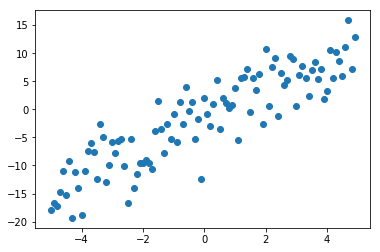

In [311]:
plt.scatter(xs, ys)

### Train

In [370]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.linear(x)


net = LinearRegression()

In [371]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr = 1e-3)
for i in range(1000):
    optimizer.zero_grad()
    loss = criterion(ys, net(xs))
    loss.backward() 
    optimizer.step()
    if i % 200 == 0:
        print("loss -> {}".format(loss))

loss -> 58.01935577392578
loss -> 14.985800743103027
loss -> 14.752924919128418
loss -> 14.671276092529297
loss -> 14.634634971618652


In [372]:
ys_predict = net(xs)

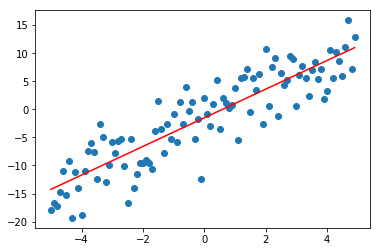

In [373]:
with torch.no_grad():  
    plt.scatter(xs, ys)
    plt.plot(xs.numpy(), ys_predict.detach().numpy(), color='red')